In [ ]:
# Download dataset

!gdown --id 1nzqavrTGHuRo-r5xwqgOknxrWswhdluV
!unzip /content/alzheimerdataset.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDe

In [ ]:
# Import library yang diperlukan

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

In [ ]:
train = ImageDataGenerator()
test = ImageDataGenerator()
validation = ImageDataGenerator()

Pre-Processing Data untuk Dataset

In [ ]:
train = '/content/Alzheimer_s Dataset/train'

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.3,
    image_size=(224, 224),
    batch_size=32,
    subset='training',
    seed=500
)

Found 5121 files belonging to 4 classes.
Using 3585 files for training.


Validation Data diambil sepertiga dari Training Dataset

In [ ]:
validation = '/content/Alzheimer_s Dataset/train'

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.3,
    image_size=(224, 224),
    batch_size=32,
    subset='validation',
    seed=500
)

Found 5121 files belonging to 4 classes.
Using 1536 files for validation.


In [ ]:
test = '/content/Alzheimer_s Dataset/test'

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224, 224),
    batch_size=32,
    seed=500
)

Found 1279 files belonging to 4 classes.


In [ ]:
class_names = ['MildDemented', 'ModerateDemented','NonDemented','VeryMildDemented']

train_data.class_names = class_names
validation_data.class_names = class_names
test_data.class_names = class_names

In [ ]:
print(validation_data)

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


Contoh Data pada Test Dataset

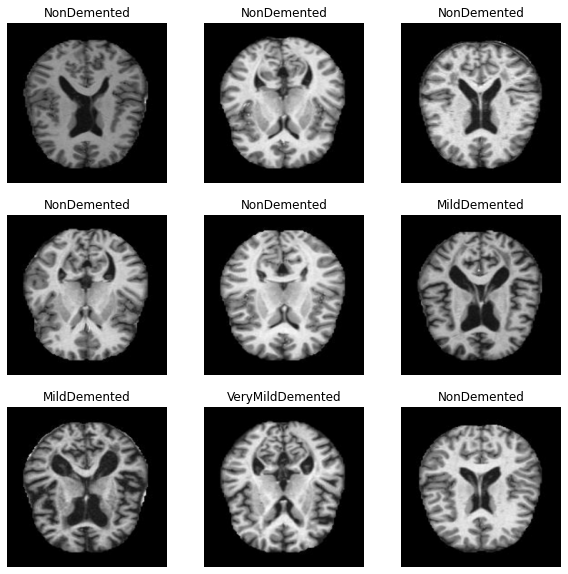

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[i]])
    plt.axis("off")
plt.savefig("sample.png")

Penambahan Layer

In [ ]:
model=Sequential()

model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

Model

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(epsilon=1e-4), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_data, validation_data=validation_data, epochs=50)
model.evaluate(test_data)

Epoch 1/50
113/113 [==============================] - 202s 2s/step - loss: 1.3283 - accuracy: 0.4675 - val_loss: 1.1440 - val_accuracy: 0.4733
Epoch 2/50
113/113 [==============================] - 200s 2s/step - loss: 1.0616 - accuracy: 0.4987 - val_loss: 1.0595 - val_accuracy: 0.4733
Epoch 3/50
113/113 [==============================] - 199s 2s/step - loss: 0.9862 - accuracy: 0.5049 - val_loss: 0.9774 - val_accuracy: 0.5521
Epoch 4/50
113/113 [==============================] - 199s 2s/step - loss: 0.9104 - accuracy: 0.5584 - val_loss: 0.9216 - val_accuracy: 0.5918
Epoch 5/50
113/113 [==============================] - 199s 2s/step - loss: 0.8563 - accuracy: 0.5791 - val_loss: 0.8762 - val_accuracy: 0.5768
Epoch 6/50
113/113 [==============================] - 199s 2s/step - loss: 0.8195 - accuracy: 0.6056 - val_loss: 0.8256 - val_accuracy: 0.6211
Epoch 7/50
113/113 [==============================] - 199s 2s/step - loss: 0.7764 - accuracy: 0.6335 - val_loss: 0.7497 - val_accuracy: 0.6745

[1.9508750438690186, 0.6372165679931641]

Hasil dari Model yang dibentuk

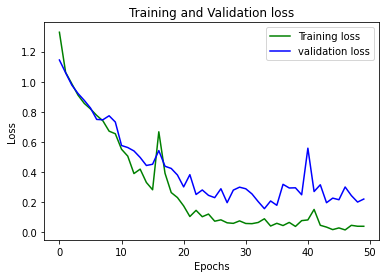

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("train_vs_val_loss.png")
plt.show()

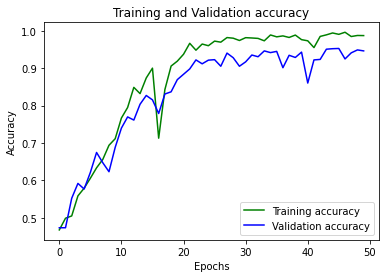

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("train_vs_val_acc.png")
plt.show()

Hasil pada Validation Dataset

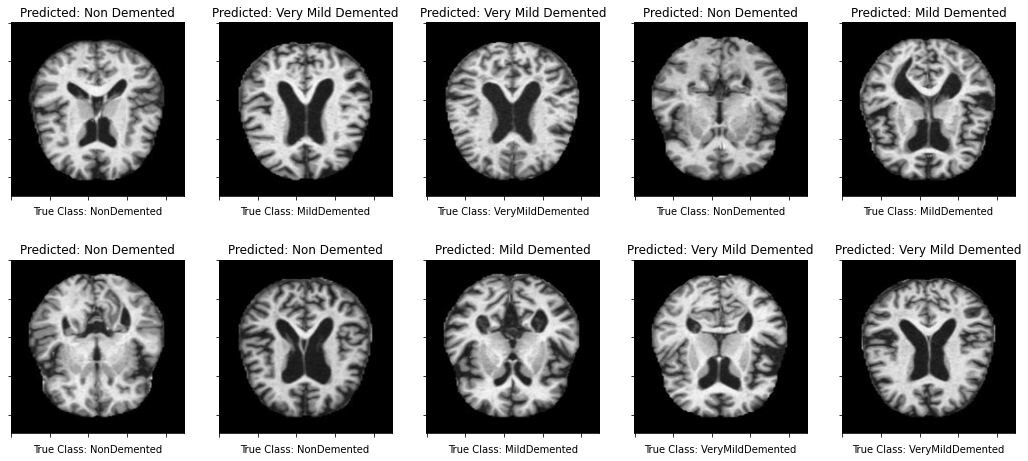

In [ ]:
class_names={0:"Mild Demented", 1:"Moderate Demented", 2:"Non Demented", 3:"Very Mild Demented"}

plt.figure(figsize=(18,8))
for images, labels in validation_data.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i]/255)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))    
        plt.title("Predicted: {}".format(class_names[p]))
        plt.xlabel("True Class: {}".format(validation_data.class_names[labels[i]]))  

Hasil pada Test Dataset

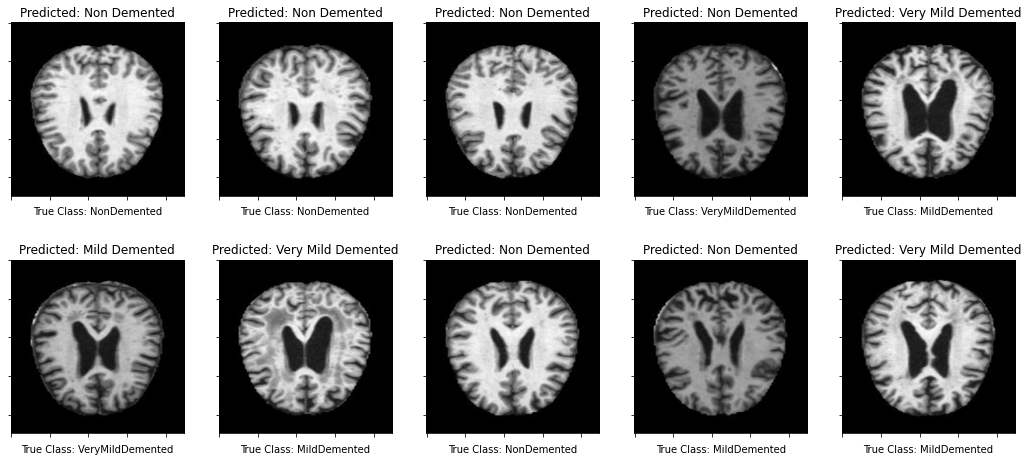

In [ ]:
plt.figure(figsize=(18,8))
for images, labels in test_data.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i]/255)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))    
        plt.title("Predicted: {}".format(class_names[p]))
        plt.xlabel("True Class: {}".format(test_data.class_names[labels[i]]))  